#**Imports**

In [64]:
# Basic Imports
import math
import copy
import random
import numpy as np
import pandas as pd

# Visual Imports
import seaborn as sb
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text Editing Imports
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Text Processing Imports
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# Data Training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**Data**

In [26]:
# Import the datasets
news = pd.read_csv('https://raw.githubusercontent.com/Erivera96/MachineLearning/master/Sentimental_Analysis/Data/Combined_News_DJIA.csv')
#reddit = pd.read_csv('https://raw.githubusercontent.com/Erivera96/MachineLearning/master/Sentimental_Analysis/Data/RedditNews.csv')

In [27]:
# Look at the Combined News DJIA
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [28]:
# Look at the Reddit News
#reddit.head()

In [29]:
news.shape

(1989, 27)

In [30]:
#reddit.shape

#**Visualize**

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"
b Georgia 'downs two Russian warplanes countries move brink war


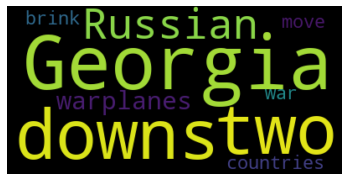

b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'
b'Why wont America Nato help us If wont help us help Iraq


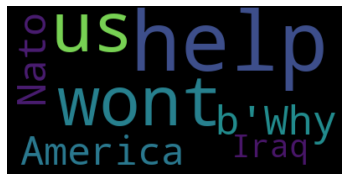

b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'
b'Remember adorable 9-year-old sang opening ceremonies That fake


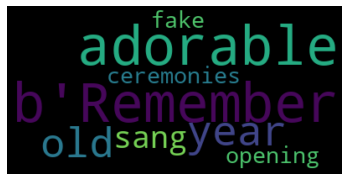

b' U.S. refuses Israel weapons to attack Iran: report'
b U.S. refuses Israel weapons attack Iran report


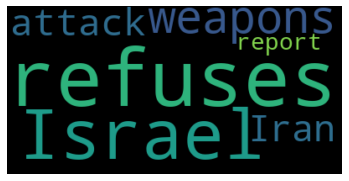

b'All the experts admit that we should legalise drugs '
b'All experts admit legalise drugs


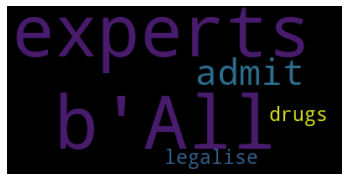

In [31]:
# Create a word cloud

# First create the stopword list
stop_words = set(stopwords.words('english'))
punctuation = ["\'", "\"",".",",",":",";","!","?","\'\'"]

for i in range(5):
    words = nltk.word_tokenize(news.Top1[i])
    filtered_words = " ".join([word for word in words if (not word in stop_words) and (not word in punctuation)])
    word_cloud = WordCloud(stopwords=stop_words).generate(filtered_words)

    print(news.Top1[i])
    print(filtered_words)

    # Now display the generated wordcloud image
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#**Clean**

In [32]:
# Make copies of the data and remove labels
features = news.copy(deep=True).drop(['Date','Label'], axis=1)
labels = news['Label'].copy(deep=True)

In [33]:
# Replace nan values with an empty string
features = features.replace(np.nan, "", regex=True)
labels = labels.replace(np.nan, "", regex=True)

In [34]:
# Take a look at shape
print(features.shape)
print(labels.shape)

(1989, 25)
(1989,)


In [35]:
features['Top1'][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [36]:
def CleanText(A, start_col=0, data_type="array", col_names = []):

    # Get words that don't add meaning to a sentence
    stop_words = set(stopwords.words('english'))

    # If it's a dataframedo the following
    if data_type != "array":

        rows = A[col_names[0]].shape[0]

        # Go through all rows
        for col in col_names:
            # Go through all columns
            for row in range(rows):

                # Take out any characters that are not words (doesn't remove characters attatched to words)
                words = re.split(r'\W',A[col][row])

                # For each word, remove the b at the front & further remove non-word characters
                for i, word in enumerate(words):
                
                    # If there's a letter be up front (b for bold) then replace with empty string
                    if word == 'b':
                        words[i] = ''
                
                    # Further removing non-word characters
                    word = re.split(r'\W', word)

                # Put the words back to a single string
                filtered_words = " ".join([word for word in words if (not word in stop_words) and (not word in punctuation)])

                # Replace all duplicate+ white spaces with just one space
                filtered_words = re.sub(r'\s+',' ',filtered_words)

                # Remove the space at the front and the end of the string
                filtered_words = re.sub(r'^\s','',filtered_words)
                filtered_words = re.sub(r'\s+$','',filtered_words)
            
                # Add this new cleaned string to the data
                A[col][row] = filtered_words

        return A
    
    # Else if it's a numpy array do the following

    # For simplicity, get rows and cols
    rows = A.shape[0]
    cols = A.shape[1]

    # Create the return matrix
    newA = np.empty((rows,cols), dtype='object')

    # Cet the start vals to be same as origianl
    newA[:, 0] = A[:, 0]

    # Go through all rows
    for row in range(rows):
        # Go through all columns (except labels)
        for col in range(start_col, cols):

            # Take out any characters that are not words (doesn't remove characters attatched to words)
            words = re.split(r'\W',A[row,col])

            # For each word, remove the b at the front & further remove non-word characters
            for i, word in enumerate(words):
                
                # If there's a letter be up front (b for bold) then replace with empty string
                if word == 'b':
                    words[i] = ''
                
                # Further removing non-word characters
                word = re.split(r'\W', word)

            # Put the words back to a single string
            filtered_words = " ".join([word for word in words if (not word in stop_words) and (not word in punctuation)])

            # Replace all duplicate+ white spaces with just one space
            filtered_words = re.sub(r'\s+',' ',filtered_words)

            # Remove the space at the front and the end of the string
            filtered_words = re.sub(r'^\s','',filtered_words)
            filtered_words = re.sub(r'\s+$','',filtered_words)
            
            # Add this new cleaned string to the data
            newA[row, col] = filtered_words

    return newA

In [37]:
features_col_names = features.columns
features_clean= CleanText(features, data_type="dataframe", col_names=features_col_names)

In [38]:
# *** Using all completely seperate headlines ****

def FeatureUnravel(labels, features, sample_mult_features=False, sample_size=10, data_size_per_label=2500):

    # Turn labels and features into numpy arrays
    np_labels = np.array(labels)
    np_features = np.array(features)

    # Extend all the labels by the shape of the features (same label for each)
    temp_list = []
    for label in np_labels:
        temp_list.extend([label]*np_features.shape[1])
    np_labels = np.array(temp_list)

    # Ravel the features out to a single array
    np_features = np_features.ravel()

    if not sample_mult_features:
        
        # Sample from a smaller portion from it
        indices = random.sample(list(np.arange(len(np_labels))), data_size_per_label)

        np_labels = np_labels[indices]
        np_features = np_features[indices]

    else: #if sample_mult_features:
        np_labels, np_features = SampleFeatures(np_labels, np_features, sample_size, data_size_per_label)

    return np_labels, np_features

In [39]:
def SampleFeatures(labels, features, sample_size, data_size_per_label):

    # For each label type, extract all those labels (ex: if labels are 0 and 1, take all 0s and take all 1s)
    unique_labels = np.unique(labels)
    split_labels_indeces = np.array([[index for index, label in enumerate(labels) if label == unique_label] for unique_label in unique_labels])

    # take string samples of sample_size concat together then stack to make features data_size
    samples = []
    ret_labels = []
    ret_features = []

    for label_type in range(split_labels_indeces.shape[0]):
        for j in range(data_size_per_label):

            # how long the record strings will be
            samples = np.array(random.sample(split_labels_indeces[label_type], sample_size))

            # set the label for this single entry
            ret_labels.append(label_type)

            # concat the sampled strings, and add to entry
            ret_features.append(" ".join(features[samples]))

    return np.array(ret_labels), np.array(ret_features)

In [40]:
print(features_clean.shape)
print(labels.shape)

(1989, 25)
(1989,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_clean, labels, test_size=0.2, random_state=37, shuffle=False)

In [42]:
#new_y_test, new_X_test = FeatureUnravel(y_test, X_test)

In [43]:
new_y_train, new_X_train = FeatureUnravel(y_train, X_train, sample_mult_features=True, sample_size=100, data_size_per_label=2500)

In [44]:
print(new_y_train.shape)
print(new_X_train.shape)

(5000,)
(5000,)


#**Process**

In [45]:
# Split the data
#X_train, X_test, y_train, y_test = train_test_split(features_clean, labels, test_size=0.2, random_state=37)

# *** Splitting the data that was seperate headlines ***
#X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.2, random_state=37)
#train = X_train.copy()
#test = X_test.copy()

In [46]:
# Condense the features into a single feature (1st Attempt)
"""
train = X_train.copy(deep=True)
train['All'] = train[col_names].agg(" ".join, axis=1)
train = train['All'].sort_index(axis=0).copy(deep=True).to_numpy()
"""

col_names = features_clean.columns

new_X_test = X_test.copy(deep=True)
new_X_test['All'] = new_X_test[col_names].agg(" ".join, axis=1)
new_X_test = new_X_test['All'].sort_index(axis=0).copy(deep=True).to_numpy()

In [47]:
print(new_X_test.shape)
print(y_test.shape)

(398,)
(398,)


**Visualize a little**

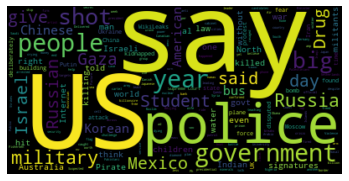

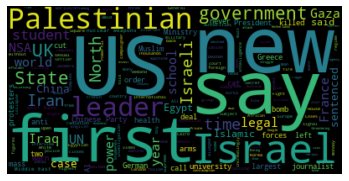

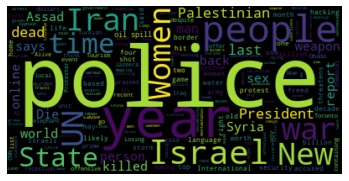

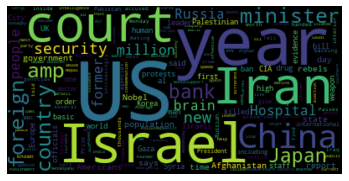

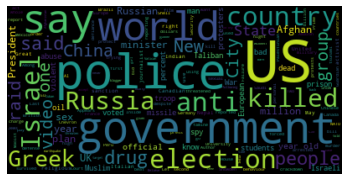

In [48]:
for i in range(5):
    word_cloud = WordCloud().generate(new_X_train[i])
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [49]:
# Convert text using 1-hot encoding
cv = CountVectorizer(binary=True,ngram_range=(1,1))
cv.fit(new_X_train)
X_train = cv.transform(new_X_train)
X_test = cv.transform(new_X_test)

#**Train-Test-Analyze**

**Gaussian Naive Bayes**

In [50]:
X_train.shape

(5000, 31506)

In [51]:
print(y_test.shape)

(398,)


In [52]:
print(X_test.shape)

(398, 31506)


In [62]:
mnb = MultinomialNB()
mnb.fit(X_train.toarray(), new_y_train)
mnb.predict(X_test.toarray())
mnb.score(X_test.toarray(), y_test)

0.4949748743718593

In [66]:
lsvc = LinearSVC()
lsvc.fit(X_train.toarray(), new_y_train)
lsvc.predict(X_test.toarray())
lsvc.score(X_test.toarray(), y_test)

0.457286432160804

In [105]:
train = np.sum(X_train.toarray(),axis=0) > 0
test = np.sum(X_test.toarray(),axis=0) > 0
in_test_and_train = np.sum(np.all(np.stack((train,test)),axis=0))
print(f'Percentage of tests words encountered in train {in_test_and_train/np.sum(test)}')

Percentage of tests words encountered in train 1.0
